## Example SWMM run with urbansurge
This example notebook provides a comprehensive example of running a SWMM analysis on a network with urbansurge.

There is example code for:
- Editing the simulation time period.
- Adding new precipitation time series.
- Editing node and conduit values.

### Required imports
The scripts require library imports and local imports from urbansurge.

In [1]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Local imports.
from urbansurge import swmm_model

In [2]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config.yml"

In [3]:
# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2017-01-01 00:00:00
Start Time: 2017-01-02 00:00:00
Updated Geom1 value to 4 for 2 in 2
Set Link 2 diameter to 4
Updated Roughness value to 0.02 for 2 in 2
Set Link 2 roughness to 0.02


In [4]:
# Run the simulation.
swmm.run_simulation()

2017-01-01 00:00:30 , 0
2017-01-01 00:50:30 , 4
2017-01-01 01:40:30 , 7
2017-01-01 02:30:30 , 10
2017-01-01 03:20:30 , 14
2017-01-01 04:10:30 , 17
2017-01-01 05:00:30 , 21
2017-01-01 05:50:30 , 24
2017-01-01 06:40:30 , 28
2017-01-01 07:30:30 , 31
2017-01-01 08:20:30 , 35
2017-01-01 09:10:30 , 38
2017-01-01 10:00:30 , 42
2017-01-01 10:50:30 , 45
2017-01-01 11:40:30 , 49
2017-01-01 12:30:30 , 52
2017-01-01 13:20:30 , 56
2017-01-01 14:10:30 , 59
2017-01-01 15:00:30 , 63
2017-01-01 15:50:30 , 66
2017-01-01 16:40:30 , 69
2017-01-01 17:30:30 , 73
2017-01-01 18:20:30 , 76
2017-01-01 19:10:30 , 80
2017-01-01 20:00:30 , 83
2017-01-01 20:50:30 , 87
2017-01-01 21:40:30 , 90
2017-01-01 22:30:30 , 94
2017-01-01 23:20:30 , 97


   15_depth  16_depth  18_depth  19_depth  20_depth  17_depth   
0  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000  \
1  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000   
2  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000   
3  0.000000  0.000000   0.00000  0.000000  0.000000  0.000000   
4  0.597259  0.595441   1.67453  0.570459  0.568698  0.516349   

             datetime  
0 2017-01-01 00:15:00  
1 2017-01-01 00:30:00  
2 2017-01-01 00:45:00  
3 2017-01-01 01:00:00  
4 2017-01-01 01:15:00  
   15_flood  16_flood  18_flood  19_flood  20_flood  17_flood   
0       0.0       0.0       0.0       0.0       0.0       0.0  \
1       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0   

             datetime  
0 2017-01-01 00:15:00  
1 2017-01-01 00:30:00  
2 

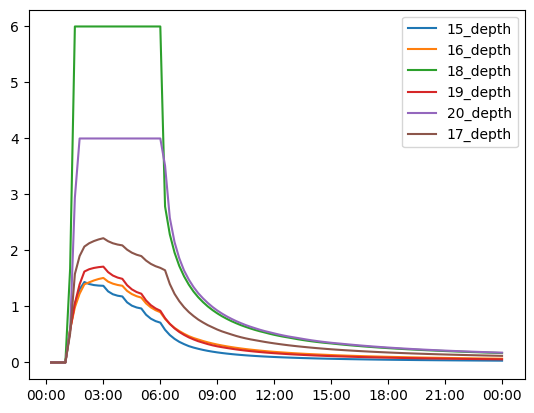

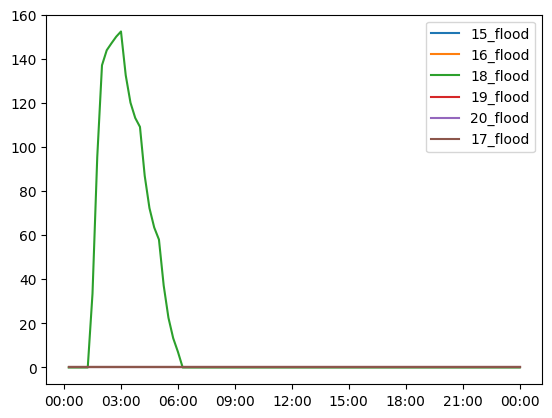

In [7]:
# Plot node depths.
node_depth_df = swmm.get_node_depths()
node_flood_df = swmm.get_node_flooding()
print(node_depth_df.head())
print(node_flood_df.head())

# Plot node depths.
fig, ax = plt.subplots()
for col in node_depth_df.columns:
    if '_depth' in col:
        ax.plot(node_depth_df['datetime'], node_depth_df[col], label=f'{col}')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.legend()

# Plot node flooding.
fig, ax = plt.subplots()
for col in node_flood_df.columns:
    if '_flood' in col:
        ax.plot(node_flood_df['datetime'], node_flood_df[col], label=f'{col}')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.legend()